# EDA Framework

Here's a framework for Exploratory Data Analysis (EDA):

1. **Understand the Data**:
   - Get familiar with the dataset's structure, including the number of rows and columns, data types, and any missing values.
   - Review the dataset's documentation or data dictionary to understand the meaning of each variable and any data collection procedures.

2. **Data Cleaning**:
   - Handle missing values: Identify missing values and decide how to handle them (e.g., imputation, deletion, or interpolation).
   - Remove duplicates: Check for and remove any duplicate rows from the dataset.
   - Address outliers: Identify and handle outliers that may skew the analysis or modeling results.

3. **Summary Statistics**:
   - Compute summary statistics such as mean, median, mode, standard deviation, minimum, maximum, and quartiles for numerical variables.
   - Calculate frequency counts, percentages, and unique values for categorical variables.

4. **Univariate Analysis**:
   - Visualize the distribution of each variable individually using histograms (for numerical variables) and bar plots (for categorical variables).
   - Analyze summary statistics and interpret the central tendency, spread, and shape of the distributions.

5. **Bivariate Analysis**:
   - Explore relationships between pairs of variables using scatter plots (for two numerical variables) or box plots/violin plots (for numerical vs. categorical variables).
   - Calculate correlation coefficients (e.g., Pearson correlation) to quantify the strength and direction of linear relationships between numerical variables.
   - Conduct hypothesis tests (e.g., t-test, ANOVA) to compare means across different groups or categories.

6. **Multivariate Analysis**:
   - Visualize relationships among multiple variables using pair plots, heatmaps, or parallel coordinate plots.
   - Identify patterns, clusters, or trends that emerge when considering multiple variables simultaneously.

7. **Dimensionality Reduction**:
   - Apply dimensionality reduction techniques (e.g., PCA, t-SNE) to visualize high-dimensional data in lower dimensions and identify underlying structures.

8. **Feature Engineering**:
   - Create new features or transform existing features based on insights gained from the EDA process.
   - Combine, encode, or scale features as needed for modeling purposes.

9. **Documentation and Reporting**:
   - Document findings, insights, and any data preprocessing steps performed during the EDA process.
   - Summarize key takeaways and recommendations for further analysis or modeling.
   - Communicate results effectively through visualizations, tables, and narrative explanations.

By following this framework, you can systematically explore and understand the dataset, identify patterns and relationships, and generate insights to inform subsequent analysis or modeling decisions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy import stats

In [2]:
# import data
# CLEAN_DATA_DIR = "Dataset/titanic dataset/clean_data"
DATA_DIR = "Dataset/titanic dataset"

train = pd.read_csv(os.path.join(DATA_DIR,"train.csv"))
# test = pd.read_csv(os.path.join(DATA_DIR,"test.csv"))
# ss = pd.read_csv(os.path.join(DATA_DIR, "gender_submission.csv"))
df = train.copy()

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 0. Hypothesizing some questions based on demographics

Demographic Questions:

1. **Gender Distribution**:
   - What is the gender distribution among passengers?
   - How many male and female passengers were onboard?
   - Did the gender distribution vary across different passenger classes or age groups?

2. **Age Distribution**:
   - What is the age distribution of passengers?
   - What is the average age of passengers?
   - How does the age distribution differ between survivors and non-survivors?

3. **Passenger Class**:
   - How many passengers were in each class (First, Second, Third)?
   - What percentage of passengers were in each class?
   - Did the passenger class influence survival rates?

4. **Family Status**:
   - How many passengers were traveling with family members (e.g., spouse, siblings, parents, children)?
   - How many passengers were traveling alone?
   - Did family status affect survival rates?

5. **Embarked Port**:
   - How many passengers embarked from each port (Southampton, Cherbourg, Queenstown)?
   - Did the port of embarkation correlate with passenger class or survival rates?

6. **Fare Distribution**:
   - What is the distribution of fares paid by passengers?
   - Are there any outliers in the fare distribution?
   - How does fare correlate with passenger class or survival outcomes?

7. **Cabin Deck**:
   - How many passengers had cabin information available?
   - What were the cabin deck distributions among different passenger classes?
   - Did passengers with cabin information have higher survival rates?

8. **Title or Name Prefix**:
   - What are the most common titles or name prefixes (e.g., Mr., Mrs., Miss) among passengers?
   - How do titles correlate with gender, age, or passenger class?
   - Did passengers with certain titles have different survival outcomes?

9. **Survival Rates**:
   - What is the overall survival rate among passengers?
   - How do survival rates vary by gender, age group, passenger class, family status, or embarked port?

These demographic questions can help provide a comprehensive understanding of the Titanic dataset and may reveal patterns or correlations that could be further explored through analysis and modeling.

# 1. Understanding the Data

#### Data Dictionary

Variable	|Definition	|Key
--| --|--
survival|	Survival	|0 = No, 1 = Yes
pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
sex	|Sex	|
Age	|Age in years|	
sibsp	|# of siblings / spouses aboard the Titanic|
parch	|# of parents / children aboard the Titanic	|
ticket	|Ticket number	|
fare	|Passenger fare|	
cabin	|Cabin number|	
embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

#### *Variable Notes*

*pclass:* A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

*age:* Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

*sibsp:* The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

*parch:* The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Continuous Variables:

    - PassengeId
    - Age
    - SibSp
    - Fare
    
Categorical Variables:

    - Survived
    - Pclass
    - Sex
    - parch
    - Ticket

Text Variable:

    - Name

## 1.1 Create Test Set

In [5]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, stratify=df["Survived"])

In [32]:
train_df["Survived"].value_counts() #/len(train_df) * 100

Survived
0    439
1    273
Name: count, dtype: int64

In [6]:
test_df["Survived"].value_counts() #/len(test_df) * 100

Survived
0    110
1     69
Name: count, dtype: int64

# 2. Data Cleaning

   - Handle missing values: Identify missing values and decide how to handle them (e.g., imputation, deletion, or interpolation).
   - Remove duplicates: Check for and remove any duplicate rows from the dataset.
   - Address outliers: Identify and handle outliers that may skew the analysis or modeling results.

### Checking For Missing Values

In [7]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            147
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          549
Embarked         2
dtype: int64

In [8]:
test_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          138
Embarked         0
dtype: int64

*Conclusion:*

- Missing values are present
- `Age, Cabin, Embarked` do have missing values

*Action:*

- Impute/ Delete/ Interpolate

### 1. Handling Missing Values

Train Missing Data:

    - Continuous:
        - Age
        
    - Categorical:
        - Cabin
        - Embarked

Test Missing Data:

    - Continuous:
        - Age
        - Fare

    - Categorical:
        - Cabin
        - Embarked        

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.500,T,S
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.250,NaN,S
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.0,0,0,349912,7.775,NaN,S
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.150,NaN,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.500,NaN,S


In [39]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [146]:
TARGET_COL = train_df["Survived"].copy()
TRAIN_NUM = train_df[["Age", "Fare"]].copy()
TRAIN_CAT = train_df[['Pclass', 'Sex', 'SibSp','Parch', 'Ticket', 'Cabin', 'Embarked']].copy()
TRAIN_TEXT = train_df[["Name"]].copy()

#### Imputating Missing Values

Numerical:

In [147]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy="median")

num_imputer.fit(TRAIN_NUM)

SimpleImputer(strategy='median')

In [148]:
num_imputer.statistics_

array([29.     , 14.45625])

In [149]:
imputed_train_num = num_imputer.transform(TRAIN_NUM)

TRAIN_NUM_IMPUTED = pd.DataFrame(imputed_train_num, columns=TRAIN_NUM.columns)

In [150]:
TRAIN_NUM_IMPUTED.isna().sum()

Age     0
Fare    0
dtype: int64

Categorical:

In [151]:
for i in TRAIN_CAT.columns:
    n = TRAIN_CAT[i].nunique()
    if n < 10:
        print(i,": ",TRAIN_CAT[i].unique())
    else:
        print(i,": ",TRAIN_CAT[i].nunique())

Pclass :  [2 3 1]
Sex :  ['male' 'female']
SibSp :  [1 0 2 3 8 5 4]
Parch :  [0 1 2 5 4 3]
Ticket :  573
Cabin :  128
Embarked :  ['S' 'C' 'Q' nan]


Ordinal: 
- Pclass 
- Ticket 
- Cabin 
- Embarked 

Nominal:
- Sex
- SibSp
- Parch


In [152]:
cat_imputer = SimpleImputer(strategy="most_frequent")

cat_imputer.fit(TRAIN_CAT)

SimpleImputer(strategy='most_frequent')

In [153]:
cat_imputer.statistics_

array([3, 'male', 0, 0, '1601', 'G6', 'S'], dtype=object)

In [154]:
imputed_train_cat = cat_imputer.transform(TRAIN_CAT)

TRAIN_CAT_IMPUTED = pd.DataFrame(imputed_train_cat, columns=TRAIN_CAT.columns)

In [155]:
TRAIN_CAT_IMPUTED.isna().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Cabin       0
Embarked    0
dtype: int64

In [156]:
TRAIN_NUM_IMPUTED

,Age,Fare
0,21.0,11.5000
1,29.0,7.8958
2,40.0,9.4750
3,29.0,26.5500
4,27.0,53.1000
...,...,...
707,29.0,7.7500
708,30.0,56.9292
709,29.0,133.6500
710,26.0,18.7875


In [157]:
# Concatenate column-wise
# reseting the indexes of dataframe it was a problem
imputed_df1 = pd.concat([TRAIN_NUM_IMPUTED.reset_index(drop=True), 
                        TRAIN_CAT_IMPUTED.reset_index(drop=True), 
                        TRAIN_TEXT.reset_index(drop=True), 
                        TARGET_COL.reset_index(drop=True)], axis=1)

In [158]:
imputed_df1.head()

,Age,Fare,Pclass,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Name,Survived
0,21.0,11.5000,2,male,1,0,28134,G6,S,"Giles, Mr. Frederick Edward",0
1,29.0,7.8958,3,male,0,0,349254,G6,C,"Gheorgheff, Mr. Stanio",0
2,40.0,9.4750,3,female,1,0,7546,G6,S,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",0
3,29.0,26.5500,1,male,0,0,113028,C124,S,"Klaber, Mr. Herman",0
4,27.0,53.1000,1,male,1,0,113806,E8,S,"Chambers, Mr. Norman Campbell",1


In [159]:
imputed_df1.isna().sum()

Age         0
Fare        0
Pclass      0
Sex         0
SibSp       0
Parch       0
Ticket      0
Cabin       0
Embarked    0
Name        0
Survived    0
dtype: int64

##### Saving Imputed Data

In [ ]:
# imputed_df1.to_csv(os.path.join(, ""),index=False)

#### Deleteing Missing Values

In [160]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            135
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          541
Embarked         2
dtype: int64

*Actions:*

- Drop Age and Embarked data rows
- Drop Cabin column

In [161]:
# dropping rows
imputed_df2 = train_df.dropna(subset=["Age", "Embarked"], axis=0)

In [162]:
# drop column
imputed_df2.drop(columns=["Cabin"], axis=1, inplace=True)

/var/folders/8y/3b6b9p6d5vjg7ql8yvqrf69w0000gn/T/ipykernel_1383/3488388817.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imputed_df2.drop(columns=["Cabin"], axis=1, inplace=True)


In [163]:
imputed_df2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

#### Interpolating Missing Values

In [ ]:
# we have to try here kNN



### 2. Remove Duplicates

Numeric:

In [165]:
# Check for duplicates
duplicate_rows = imputed_df1.duplicated()

print("\nDuplicate rows:")
print(duplicate_rows.sum())



Duplicate rows:
0


In [166]:
# Check for duplicates
duplicate_rows = imputed_df2.duplicated()

print("\nDuplicate rows:")
print(duplicate_rows.sum())


Duplicate rows:
0


*Conclusion:*

- No duplicate rows

*Action:*

- No action

### 3. Addressing Outliers

Identify and handle outliers that may skew the analysis or modeling results.

Mathods:
1. Visual Method
2. Z-Score Method
3. IQR (Interquartile Range) Method

#### 1. Visual Method

In [178]:
def show_outliers(df):
    """this plot is there to show outliers visually"""
    # Plot histograms and box plots side by side using a for loop
    plt.figure(figsize=(12, 8))

    for i, column in enumerate(df.columns, 1):
        # Plot histograms
        plt.subplot(len(df.columns), 2, 2*i-1)
        plt.hist(df[column], bins=20, alpha=0.5)
        plt.xlabel('Value')
        plt.ylabel('Frequency')
        plt.title(f'Histogram: {column}')

        # Plot box plots
        plt.subplot(len(df.columns), 2, 2*i)
        plt.boxplot(df[column])
        plt.ylabel('Value')
        plt.title(f'Box plot: {column}')

    plt.tight_layout()
    plt.show()


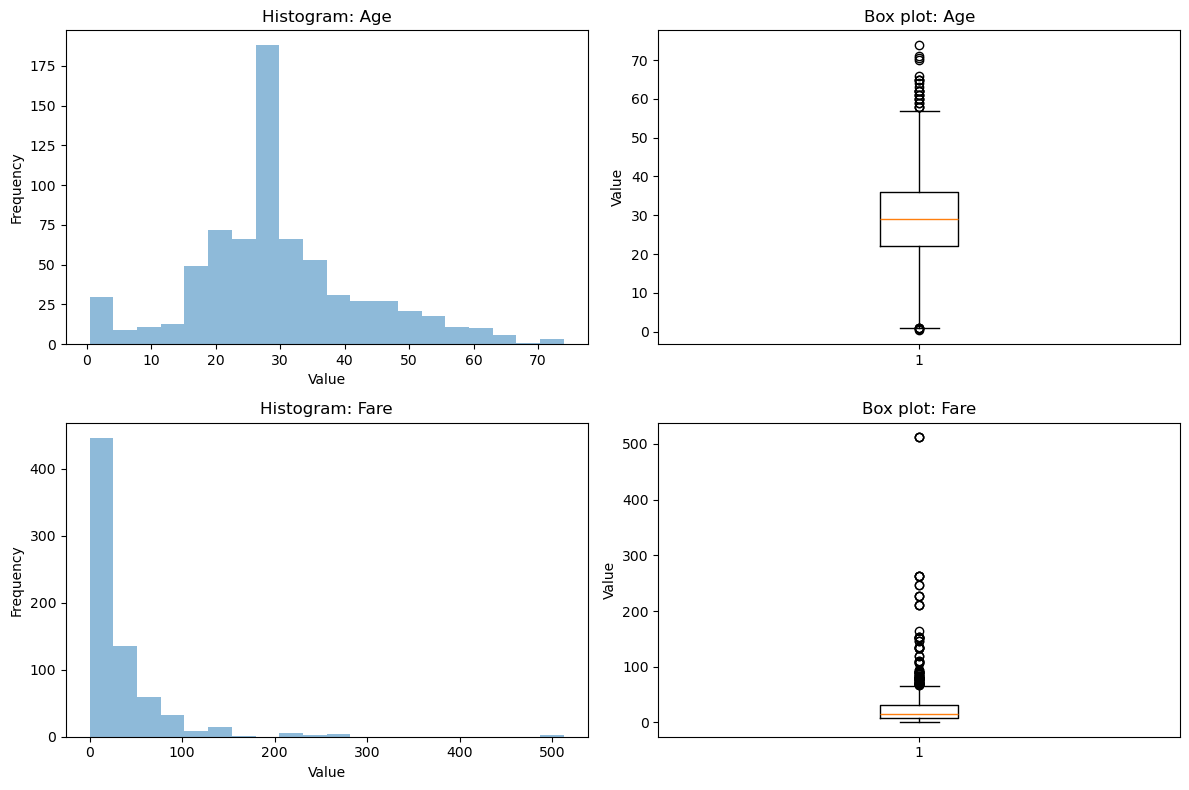

In [179]:
show_outliers(TRAIN_NUM_IMPUTED)

*Conclusion:*

- Fare is quite right skewded
- Age and Fare both contains outliers

*Actions:*

- log transfromation on Fare

- Tukey's Method : this is IQR based method 

In [ ]:
def detect_outlier(df, column):
    """this method is to detect outlier and return their index to address them with other techniques""" 
    #

In [50]:
df["Age_median"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median, Length: 891, dtype: float64

In [47]:
q1 = np.quantile(df["Age_median"],.25)
q3 = np.quantile(df["Age_median"],.75)
IQR = q3 - q1
lower_bond = q1 - 1.5*IQR
higher_bond = q3 + 1.5*IQR


In [48]:
lower_bond

2.5

In [49]:
higher_bond

54.5

# 3. Summary Statistics

   - Compute summary statistics such as mean, median, mode, standard deviation, minimum, maximum, and quartiles for numerical variables.
   - Calculate frequency counts, percentages, and unique values for categorical variables.

# 4. Univariate Analysis

   - Visualize the distribution of each variable individually using histograms (for numerical variables) and bar plots (for categorical variables).
   - Analyze summary statistics and interpret the central tendency, spread, and shape of the distributions.

# 5. Bivariate Analysis

   - Explore relationships between pairs of variables using scatter plots (for two numerical variables) or box plots/violin plots (for numerical vs. categorical variables).
   - Calculate correlation coefficients (e.g., Pearson correlation) to quantify the strength and direction of linear relationships between numerical variables.
   - Conduct hypothesis tests (e.g., t-test, ANOVA) to compare means across different groups or categories.